In [7]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import dataset

In [23]:
node_id = '001e0610bbf9'

dates = [
    '2017-10-01',
    '2017-10-02',
    '2017-10-03',
    '2017-10-04',
    '2017-10-05',
    '2017-10-06',
    '2017-10-07',
    '2017-10-08',
    '2017-10-09',
    '2017-10-10',
    '2017-10-11',
]

url = 'http://beehive1.mcs.anl.gov/datasets/2/{}/{}.csv.gz'

df = dataset.load_datasets([url.format(node_id, date) for date in dates])

In [24]:
def show_plots(df):
    columns = [c for c in df.columns if 'temperature' in c and 'PR' not in c]
    df[columns].plot(figsize=(14, 8), title='Temperature')

    columns = [c for c in df.columns if 'humidity' in c]
    df[columns].plot(figsize=(14, 8), title='Humidity')
    
    columns = [c for c in df.columns if 'accel' in c]
    df[columns].plot(figsize=(14, 8), title='Acceleration')
    
    columns = [c for c in df.columns if 'intensity' in c]
    df[columns].plot(figsize=(14, 8), title='Intensity')
    
#     columns = [c for c in df.columns if 'chem' in c]
#     df[columns].plot(figsize=(14, 8), title='Chemical')

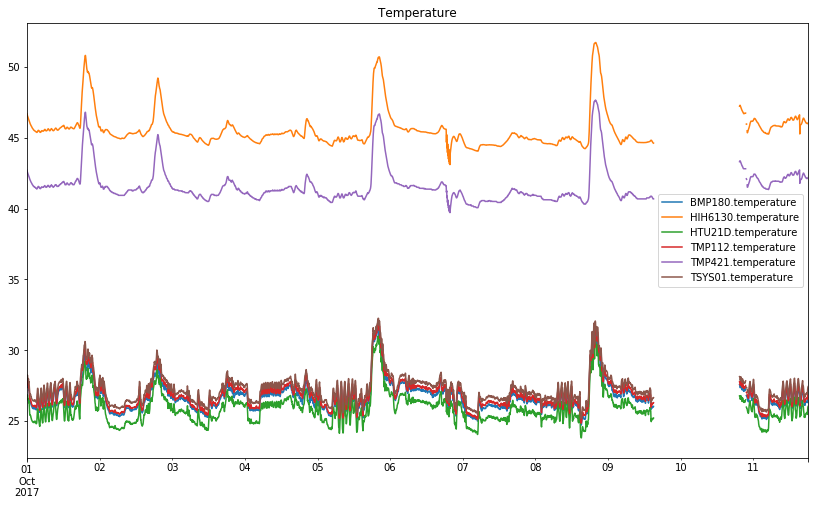

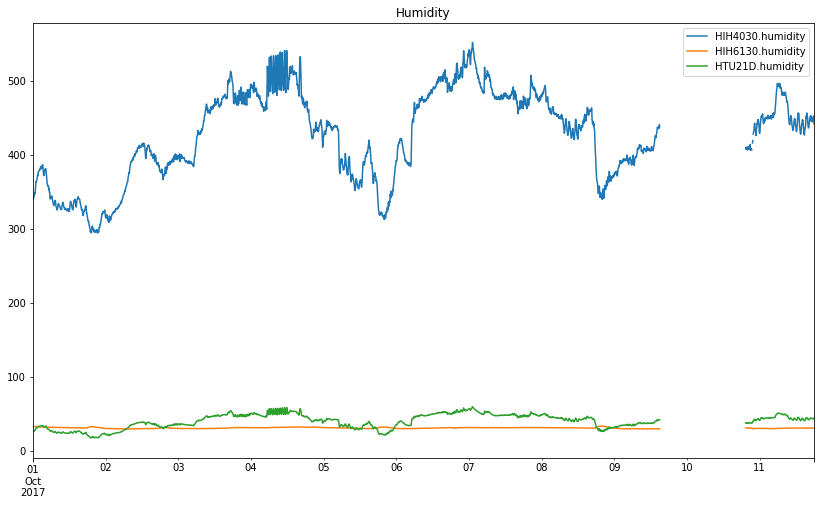

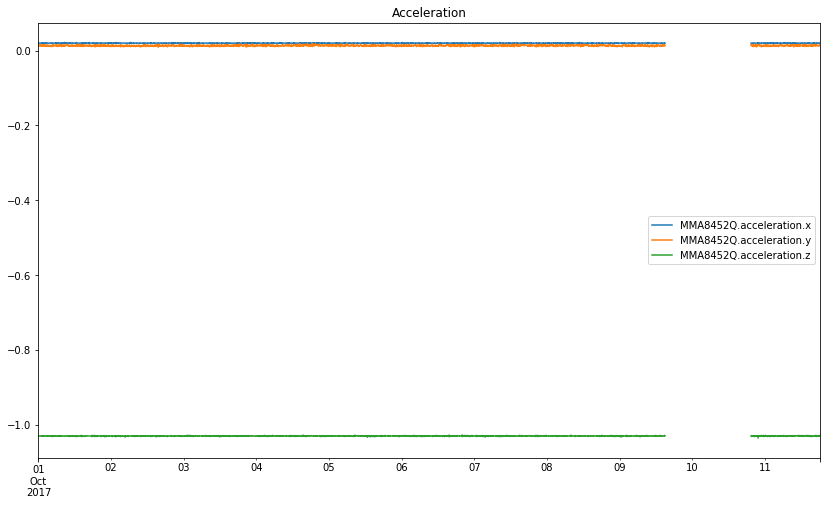

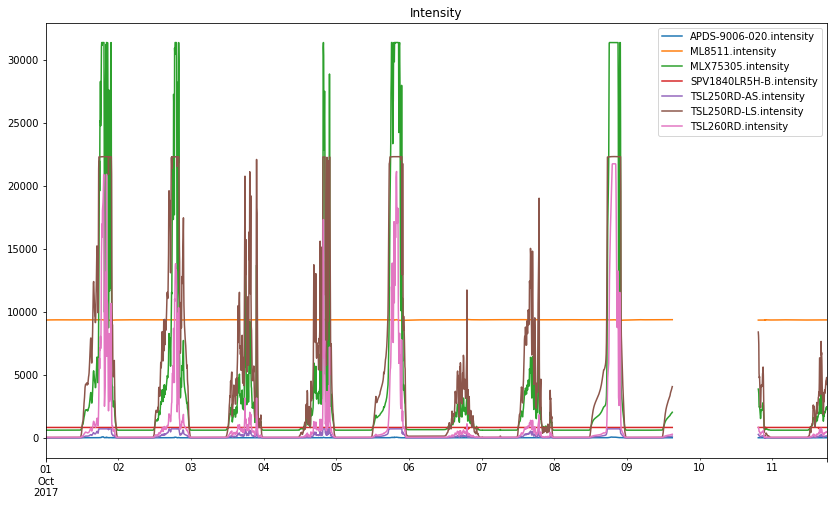

In [25]:
show_plots(df.resample('5Min').mean())